In [1]:
import autograd.numpy as np
from autograd import value_and_grad
from data import data_utils
from data.data_utils import plot_digit
import matplotlib.pyplot as plt

In [2]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('mnist_small')

In [3]:
def forward_pass(W1, W2, W3, b1, b2, b3, x):
    """
    forward-pass for an fully connected neural network with 2 hidden layers of M neurons
    Inputs:
        W1 : (M, 784) weights of first (hidden) layer
        W2 : (M, M) weights of second (hidden) layer
        W3 : (10, M) weights of third (output) layer
        b1 : (M, 1) biases of first (hidden) layer
        b2 : (M, 1) biases of second (hidden) layer
        b3 : (10, 1) biases of third (output) layer
        x : (N, 784) training inputs
    Outputs:
        Fhat : (N, 10) output of the neural network at training inputs
    """
    H1 = np.maximum(0, np.dot(x, W1.T) + b1.T) # layer 1 neurons with ReLU activation, shape (N, M)
    H2 = np.maximum(0, np.dot(H1, W2.T) + b2.T) # layer 2 neurons with ReLU activation, shape (N, M)
    Fhat = np.dot(H2, W3.T) + b3.T # layer 3 (output) neurons with linear activation, shape (N, 10)
    # #######
    # Note that the activation function at the output layer is linear!
    # You must impliment a stable log-softmax activation function at the ouput layer
    # #######
    
    maxVals = np.max(Fhat,axis=1).reshape(-1,1)
    Fhat = Fhat - maxVals
    p = np.exp(Fhat)
    p = np.sum(p,axis = 1,keepdims = True)
    Fhat = Fhat - np.log(p)

    return Fhat

In [4]:
# np.random.seed(0)
# M = 50 # number of neurons in hidden layer
# W1 = np.random.randn(M, 784)
# W2 = np.random.randn(M, M)
# W3 = np.random.randn(10, M)
# b1 = np.zeros((M, 1))
# b2 = np.zeros((M, 1))
# b3 = np.zeros((10, 1))

# forward_pass(W1, W2, W3, b1, b2, b3, x_test)



In [5]:
def negative_log_likelihood(W1, W2, W3, b1, b2, b3, x, y):
    """
    computes the negative log likelihood of the model `forward_pass`
    Inputs:
        W1, W2, W3, b1, b2, b3, x : same as `forward_pass`
        y : (N, 10) training responses
    Outputs:
        nll : negative log likelihood
    """
    Fhat = forward_pass(W1, W2, W3, b1, b2, b3, x)
    # ########
    # Note that this function assumes a Gaussian likelihood (with variance 1)
    # You must modify this function to consider a categorical (generalized Bernoulli) likelihood
    # ########
    
#     nll = 0.5*np.sum(np.square(Fhat - y)) + 0.5*y.size*np.log(2.*np.pi) 
    
    
#     print(Fhat)


    nll = -np.sum(np.multiply(Fhat,y))
    
    
#     print(np.multiply(Fhat,y))
    
    return nll

In [6]:
nll_gradients = value_and_grad(negative_log_likelihood, argnum=[0,1,2,3,4,5])

"""
    returns the output of `negative_log_likelihood` as well as the gradient of the 
    output with respect to all weights and biases
    Inputs:
        same as negative_log_likelihood (W1, W2, W3, b1, b2, b3, x, y)
    Outputs: (nll, (W1_grad, W2_grad, W3_grad, b1_grad, b2_grad, b3_grad))
        nll : output of `negative_log_likelihood`
        W1_grad : (M, 784) gradient of the nll with respect to the weights of first (hidden) layer
        W2_grad : (M, M) gradient of the nll with respect to the weights of second (hidden) layer
        W3_grad : (10, M) gradient of the nll with respect to the weights of third (output) layer
        b1_grad : (M, 1) gradient of the nll with respect to the biases of first (hidden) layer
        b2_grad : (M, 1) gradient of the nll with respect to the biases of second (hidden) layer
        b3_grad : (10, 1) gradient of the nll with respect to the biases of third (output) layer
     """

'\n    returns the output of `negative_log_likelihood` as well as the gradient of the \n    output with respect to all weights and biases\n    Inputs:\n        same as negative_log_likelihood (W1, W2, W3, b1, b2, b3, x, y)\n    Outputs: (nll, (W1_grad, W2_grad, W3_grad, b1_grad, b2_grad, b3_grad))\n        nll : output of `negative_log_likelihood`\n        W1_grad : (M, 784) gradient of the nll with respect to the weights of first (hidden) layer\n        W2_grad : (M, M) gradient of the nll with respect to the weights of second (hidden) layer\n        W3_grad : (10, M) gradient of the nll with respect to the weights of third (output) layer\n        b1_grad : (M, 1) gradient of the nll with respect to the biases of first (hidden) layer\n        b2_grad : (M, 1) gradient of the nll with respect to the biases of second (hidden) layer\n        b3_grad : (10, 1) gradient of the nll with respect to the biases of third (output) layer\n     '

In [7]:
def update_parameters(w, grad_w, learning_rate=1.):
    """
    perform gradient descent update to minimize an objective
    Inputs:
        w : vector of parameters
        grad_w : gradient of the loss with respect to the parameters
        learning_rate : learning rate of the optimizer
    """
    
#     print('w is', w.shape)
#     print('grad', grad_w.shape)
#     p = w - learning_rate * grad_w
#     print(' p is', p.shape)
#     return p

    return w - learning_rate * grad_w

In [8]:
def run_example():
    """
    This example demonstrates computation of the negative log likelihood (nll) as
    well as the gradient of the nll with respect to all weights and biases of the
    neural network. We will use 50 neurons per hidden layer and will initialize all 
    weights and biases to zero.
    """
    # load the MNIST_small dataset
    from data.data_utils import load_dataset
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mnist_small')
    
    # initialize the weights and biases of the network
    np.random.seed(0)
    M = 100 # neurons per hidden layer
    W1 = np.random.randn(M, 784) # weights of first (hidden) layer
    W2 = np.random.randn(M, M) # weights of second (hidden) layer
    W3 = np.random.randn(10, M) # weights of third (output) layer
    b1 = np.zeros((M, 1)) # biases of first (hidden) layer
    b2 = np.zeros((M, 1)) # biases of second (hidden) layer
    b3 = np.zeros((10, 1)) # biases of third (output) layer
    
#     # considering the first 250 points in the training set, 
#     # compute the negative log likelihood and its gradients
#     (nll, (W1_grad, W2_grad, W3_grad, b1_grad, b2_grad, b3_grad)) = \
#         nll_gradients(W1, W2, W3, b1, b2, b3, x_train[:250], y_train[:250])
#     print("negative log likelihood: %.5f" % nll)
    
    
    

In [9]:
# run_example()

In [71]:
from data.data_utils import load_dataset
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mnist_small')

# initialize the weights and biases of the network
np.random.seed(0)
M = 100 # neurons per hidden layer
W1 = np.random.randn(M, 784) # weights of first (hidden) layer
W2 = np.random.randn(M, M) # weights of second (hidden) layer
W3 = np.random.randn(10, M) # weights of third (output) layer
b1 = np.zeros((M, 1)) # biases of first (hidden) layer
b2 = np.zeros((M, 1)) # biases of second (hidden) layer
b3 = np.zeros((10, 1)) # biases of third (output) layer

learning_rate = 0.00002

size = x_train.shape[0]
print(size)
batchsize = 250

trainloss = []
valloss = []

for i in range(600) : 
    randomize = np.arange(size)
    np.random.shuffle(randomize)
    x_train = x_train[randomize]
    y_train = y_train[randomize]
    
    for j in range(int(size/batchsize)):
        (nll, (W1_grad, W2_grad, W3_grad, b1_grad, b2_grad, b3_grad)) = \
            nll_gradients(W1, W2, W3, b1, b2, b3, x_train[j*batchsize:(j+1)*batchsize, :], y_train[j*batchsize:(j+1)*batchsize, :])    # update the parameters
        W1 = update_parameters(W1, W1_grad, learning_rate)
        W2 = update_parameters(W2, W2_grad, learning_rate)
        W3 = update_parameters(W3, W3_grad, learning_rate)
        b1 = update_parameters(b1, b1_grad, learning_rate)
        b2 = update_parameters(b2, b2_grad, learning_rate)
        b3 = update_parameters(b3, b3_grad, learning_rate)
    # print loss if nessessary
    nll = negative_log_likelihood(W1, W2, W3, b1, b2, b3, x_train ,y_train)  
    val = negative_log_likelihood(W1, W2, W3, b1, b2, b3, x_valid,y_valid)  


    trainloss.append(nll)
    valloss.append(val)
    
    if i==0 or (i+1) % 20 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, nll))
        print("Iter %3d, Validation Loss = %.6f" % (i+1, val))




10000
Iter   1, loss = 1219649.110790
Iter   1, Validation Loss = 139089.166213
Iter  20, loss = 89615.716065
Iter  20, Validation Loss = 36739.929652
Iter  40, loss = 25142.801817
Iter  40, Validation Loss = 31001.996135
Iter  60, loss = 6821.880022
Iter  60, Validation Loss = 28911.704192
Iter  80, loss = 1299.581344
Iter  80, Validation Loss = 28607.100299
Iter 100, loss = 221.483975
Iter 100, Validation Loss = 28520.769295
Iter 120, loss = 50.096804
Iter 120, Validation Loss = 28548.409388
Iter 140, loss = 0.078312
Iter 140, Validation Loss = 28437.472674
Iter 160, loss = 0.054832
Iter 160, Validation Loss = 28434.713146
Iter 180, loss = 0.044721
Iter 180, Validation Loss = 28432.663161
Iter 200, loss = 0.038707
Iter 200, Validation Loss = 28431.144276
Iter 220, loss = 0.034587
Iter 220, Validation Loss = 28429.980568
Iter 240, loss = 0.031528
Iter 240, Validation Loss = 28429.006614
Iter 260, loss = 0.029135
Iter 260, Validation Loss = 28428.160227
Iter 280, loss = 0.027194
Iter 2

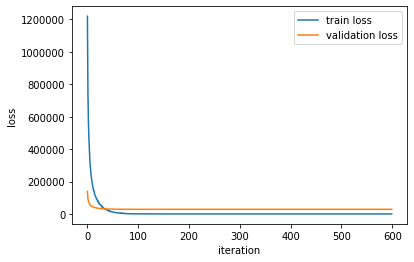

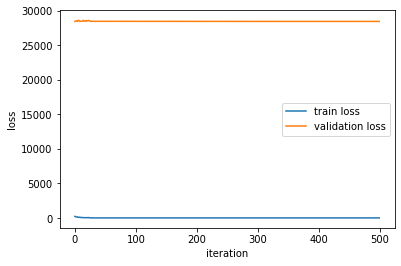

In [77]:
plt.plot(trainloss)
plt.plot(valloss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

plt.plot(trainloss[100:])
plt.plot(valloss[100:])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()



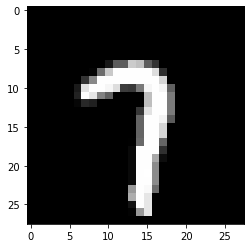

In [94]:
plot_digit(x_test[4])

In [79]:
np.argmax(forward_pass(W1, W2, W3, b1, b2, b3, x_test[39]),axis=1)

array([6])

In [80]:
predict = np.argmax(forward_pass(W1, W2, W3, b1, b2, b3, x_train),axis=1)
y = np.argmax(y_train,axis=1)
np.sum((predict==y))/y.size

1.0

In [81]:
predict = np.argmax(forward_pass(W1, W2, W3, b1, b2, b3, x_valid),axis=1)
y = np.argmax(y_valid,axis=1)
np.sum((predict==y))/y.size

0.834

In [82]:
predict = np.argmax(forward_pass(W1, W2, W3, b1, b2, b3, x_test),axis=1)
y = np.argmax(y_test,axis=1)
np.sum((predict==y))/y.size

0.847

[False False False False False False False  True False False]


array([7])

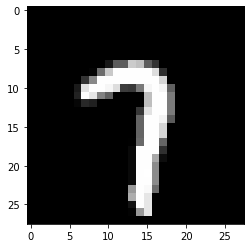

In [95]:
value = 4
plot_digit(x_test[value])
print(y_test[value])
np.argmax(forward_pass(W1, W2, W3, b1, b2, b3, x_test[value]),axis=1)
